In [25]:
import pandas as pd
from pathlib import Path
import os
import easyocr

In [2]:
dataset_path = "../dataset/train.csv"
img_dir = "../images/train/"

In [3]:
df = pd.read_csv(dataset_path)

In [8]:
import cv2
import matplotlib.pyplot as plt

image_link      https://m.media-amazon.com/images/I/61TBeGKrjA...
group_id                                                   487566
entity_name                                           item_weight
entity_value                                     3650.0 milligram
Name: 8598, dtype: object


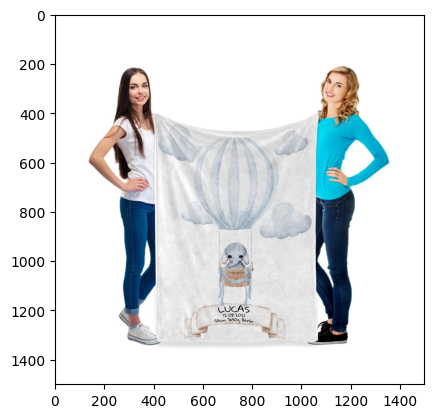

In [19]:
ind = 8598
img_path = os.path.join(img_dir,Path(df['image_link'].iloc[ind]).name)
print(df.iloc[ind])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [24]:
print(df[df['group_id'] == 487566].iloc[5]['image_link'])
df[df['group_id'] == 487566].iloc[5]

https://m.media-amazon.com/images/I/81YEhrtinRL.jpg


image_link      https://m.media-amazon.com/images/I/81YEhrtinR...
group_id                                                   487566
entity_name                                           item_weight
entity_value                                           280.0 gram
Name: 738, dtype: object

In [26]:
reader = easyocr.Reader(['en'])

/opt/miniconda3/envs/amazonMlEnv/lib/python3.12/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.

In [36]:
def get_text(img_path):
    res = reader.readtext(img_path)

    # Print the results
    for (bbox, text, prob) in res:
        # print(f'Detected text: {text} with confidence: {prob:.2f}')
        print(text)
    return res

In [37]:
def showImage(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

image_link      https://m.media-amazon.com/images/I/61kjYwiTji...
group_id                                                   487566
entity_name                                           item_weight
entity_value                                     3650.0 milligram
Name: 8597, dtype: object
https://m.media-amazon.com/images/I/61kjYwiTjiL.jpg
Lucas
i.08.202|
54cm %6509
Berlin


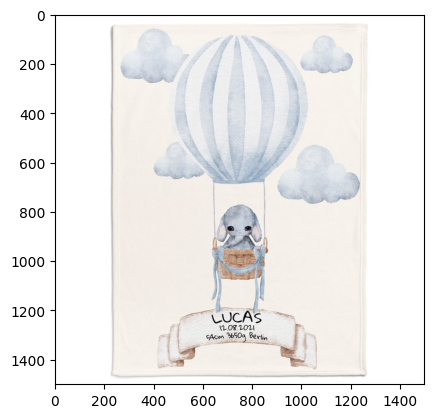

In [50]:
ind = 8597
img_path = os.path.join(img_dir,Path(df['image_link'].iloc[ind]).name)
print(df.iloc[ind])
img = cv2.imread(img_path)
print(df['image_link'].iloc[ind])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
get_text(img_path)
showImage(img_path)
# ocrTesseract(img_path)

In [42]:
from PIL import Image
import pytesseract

def ocrTesseract(img_path):
    # Load an image from file
    img = Image.open(img_path)

    # Perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Print the recognized text
    print(text)
    return text


# # Load an image from file
# img = Image.open(img_path)

# # Perform OCR on the image
# text = pytesseract.image_to_string(img)

# # Print the recognized text
# print(text)

In [51]:
ndf = df.iloc[:10]

In [52]:
def get_text_easyocr(link):
    img_path = os.path.join(img_dir,Path(link).name)
    res = reader.readtext(img_path)

    # Print the results
    text = "`"
    for (bbox, txt, prob) in res:
        # print(f'Detected text: {text} with confidence: {prob:.2f}')
        print(txt)
        text += txt + "\n"
    return res

In [53]:
ndf['image_link'].apply(get_text_easyocr)

KeyboardInterrupt: 